In [1]:
# libs itialization
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
import string
import random as r
from prettytable import PrettyTable

In [2]:
Hu_code = {}
Sl_code = {}
Hu_name = []
Hu_value = []
Hu_len = []
Sl_len = []
th = []
td = []
fh = []
fd = []

In [3]:
# simple random text generator using weighted lowecase ascii letters (letters weight from https://360wiki.ru/wiki/Letter_frequency)
def weighted_random(weights):
    number = r.random() * sum(weights.values())
    for k,v in weights.items():
        if number < v:
            break
        number -= v
    return k

prob_dict = {
    'a':	8.2,
    'b':	1.5,
    'c':	2.8,
    'd':	4.3,
    'e':	13.,
    'f':	2.2,
    'g':	2.,
    'h':	6.1,
    'i':	7.,
    'j':	0.15,
    'k':	0.77,
    'l':	4.,
    'm':	2.4,
    'n':	6.7,
    'o':	7.5,
    'p':	1.9,
    'q':	0.095,
    'r':	6.,
    's':	6.3,
    't':	9.1,
    'u':	2.8,
    'v':	0.98,
    'w':	2.4,
    'x':	0.15,
    'y':	2.,
    'z':	0.074
    }

In [4]:
# Algorithm which searches the frequency of each english letter in the file
def findTheCharFrequency(text):
    freq = dict()
    with open(text,'r') as f:
        for line in f.readlines():
            line = line.lower()
            for i in line:
                if i.isalpha():
                    if i in freq:
                        freq[i] += 1
                    else:
                        freq.update({i:1})
    return freq

In [5]:
# Simular length binary letters dictionary creation
zer0 = '00000'
for i in range (0, 26):
    Sl_code[ str(string.ascii_letters)[i:-(51-i)] ] = zer0[:-(len(bin(i+1))-2)] + bin(i+1)[2:]
print(Sl_code)

{'a': '00001', 'b': '00010', 'c': '00011', 'd': '00100', 'e': '00101', 'f': '00110', 'g': '00111', 'h': '01000', 'i': '01001', 'j': '01010', 'k': '01011', 'l': '01100', 'm': '01101', 'n': '01110', 'o': '01111', 'p': '10000', 'q': '10001', 'r': '10010', 's': '10011', 't': '10100', 'u': '10101', 'v': '10110', 'w': '10111', 'x': '11000', 'y': '11001', 'z': '11010'}


In [6]:
# node class creation
class Node(object):
    def __init__(self, name=None, value=None):
        self.name = name
        self.value = value
        self.lchild = None
        self.rchild = None

# Huffman tree creation
class HuffmanTree(object):
    # Based on node we built the tree in reverse algorithm
    def __init__(self, char_Weights):
        self.Leaf = [Node(k,v) for k, v in char_Weights.items()]
        while len(self.Leaf) != 1:
            self.Leaf.sort(key=lambda node:node.value, reverse=True)
            n = Node(value=(self.Leaf[-1].value + self.Leaf[-2].value))
            n.lchild = self.Leaf.pop(-1)
            n.rchild = self.Leaf.pop(-1)
            self.Leaf.append(n)
        self.root = self.Leaf[0]
        self.Buffer = list(range(10))

    def Hu_generate(self, tree, length):
        node = tree
        if (not node):
            return
        elif node.name:
            n = node.name
            b = str()
            for i in range(length):
                b += str(self.Buffer[i])
            Hu_code[n] = b
            Hu_name.append(n)
            Hu_value.append(b)
            return
        self.Buffer[length] = 0
        self.Hu_generate(node.lchild, length + 1)
        self.Buffer[length] = 1
        self.Hu_generate(node.rchild, length + 1)

    # Output part
    def get_code(self):
        self.Hu_generate(self.root, 0)

In [7]:
def Hu_generation (s_number):
    f = open('weightedRtext.txt', 'w')
    for i in range (0, s_number):
        f.write(weighted_random(prob_dict))
    f.close()
    text = r'weightedRtext.txt'
    l_frequency = findTheCharFrequency(text)

    # Printing full algorithm result
    tree = HuffmanTree(l_frequency)
    tree.get_code()

In [8]:
# here are functions for encryption with Huffman algorithm dictionary and with simular length dictionary
def HuEncryptWord(word):
    return ''.join([Hu_code[x] for x in word])
def SlEncryptWord(word):
    return ''.join([Sl_code[x] for x in word])
plot_len = []
for i in range (100, 1500, 100):
    Hu_generation(i)
    f = open('weightedRtext.txt')
    for word in f.read().split():
        Hu_len.append( len(HuEncryptWord(word)) )
        Sl_len.append( len(SlEncryptWord(word)) )
        plot_len.append( i )
    f.close()


In [9]:
# # Printing first algorithm result as a table of letter frequency
# text = r'weightedRtext.txt'
# l_frequency = findTheCharFrequency(text)
# for key, value in sorted(l_frequency.items()): # sorted(l_frequency.items(), key=lambda item: item[1])
#     th.append(key)
#     td.append(value)
# columns = len(th)
# f_table = PrettyTable(th)
# while td:
#     f_table.add_row(td[:columns])
#     td = th[columns:]
# print(f_table)

# # Printing full algorithm result
# tree = HuffmanTree(l_frequency)
# tree.get_code()

# # the reason of duplication of function is that this is another sorting algorithm 
# for key, value in sorted(l_frequency.items(), key=lambda item: item[1]): #sorted(l_frequency.items()): - previous one
#         fh.append(key)
#         fd.append(value)

# for i in range (0, len(fh)):
#         for j in range (0, len(fh)):
#             if Hu_name[j] == fh[i]:
#                 fd[i] = [fd[i], Hu_value[j]]
# columns = len(fh)
# Hu_table = PrettyTable()
# for i in range(0, len(fh)):
#     Hu_table.add_column(fh[i], fd[i])
# print(Hu_table)
# # print(fd)
# # print(l_frequency)
# # print(Hu_code)

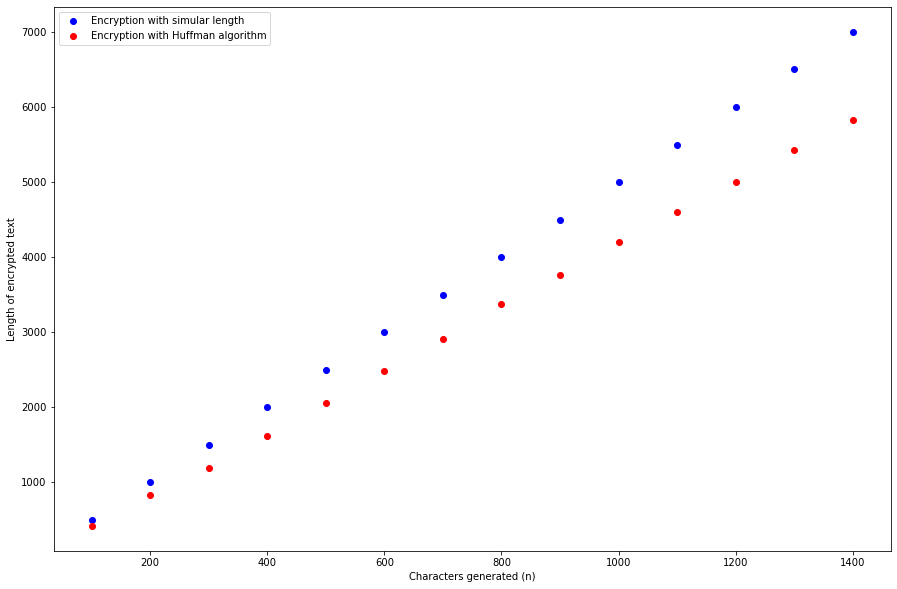

In [10]:
plt.figure(figsize=(15,10))
plt.plot(plot_len, Sl_len,'bo', label='Encryption with simular length')
plt.plot(plot_len, Hu_len, 'ro', label='Encryption with Huffman algorithm')
plt.ylabel('Length of encrypted text', fontsize=10)
plt.xlabel('Characters generated (n)', fontsize=10)
plt.legend(fontsize=10)
plt.show()